In [81]:
import numpy as np
import pandas as pd
from sklearn import tree

# Part 1: Visualizing the Data
For categorical features like "SMOKING," assume that "1" indicates that the person does not belong to this class and "2" indicates that the person does in fact belong to this class.

In [62]:
data_file = "../data/survey-lung-cancer.csv"
AGE = "AGE"
SMOKING = "SMOKING"
LUNG_CANCER = "LUNG_CANCER"
CHRONIC_DISEASE = "CHRONIC DISEASE"
data = pd.read_csv(data_file)

# Convert the "Yes/No" in the lung cancer column into "1/0"
for i in range(data.shape[0]):
    if data.loc[i, LUNG_CANCER] == "NO":  
        data.at[i, LUNG_CANCER_KEY] = 0
    else:
        data.at[i, LUNG_CANCER] = 1        
data 

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [28]:
# Separate the data into people without lung cancer and those with it
no_data = data[data[LUNG_CANCER] == 0]
yes_data = data[data[LUNG_CANCER] == 1]

## Feature Investigation
Let's look at a few features and how they correlate with lung cancer:

## Age
Most of the survey participants were > 40 years of age.

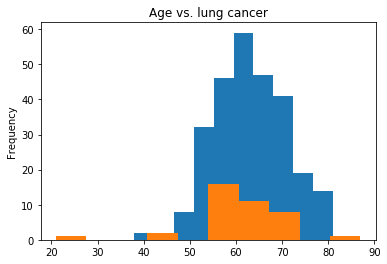

In [50]:
yes_data[AGE].plot(title="Age vs. lung cancer", kind="hist")
no_data[AGE].plot(kind="hist")

## Smoking

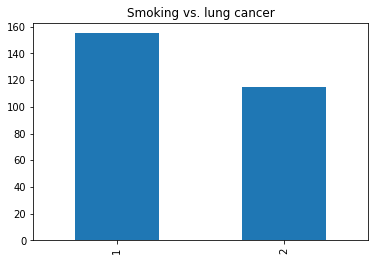

In [56]:
yes_data[SMOKING].value_counts().plot(title="Smoking vs. lung cancer", kind="bar")

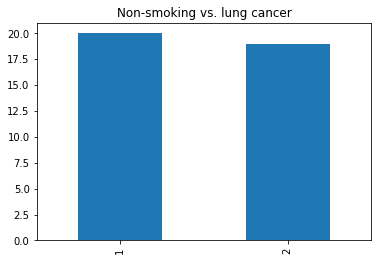

In [57]:
no_data[SMOKING].value_counts().plot(title="Non-smoking vs. lung cancer", kind="bar")

## Chronic Disease

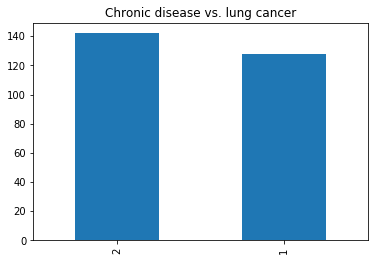

In [63]:
yes_data[CHRONIC_DISEASE].value_counts().plot(title="Chronic disease vs. lung cancer", kind="bar")

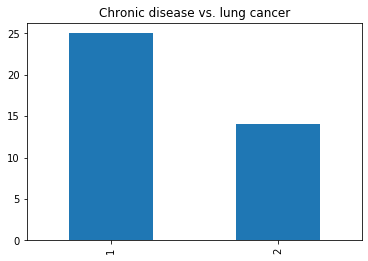

In [64]:
no_data[CHRONIC_DISEASE].value_counts().plot(title="Chronic disease vs. lung cancer", kind="bar")

# Part 2: Making Predictions

In [79]:
# Separate the data into training and validation sets
train_full = data.iloc[:200, :]
test_full = data.iloc[200:309, :]

train_X = train_full.iloc[:, 0:15]
train_y = train_full.iloc[:, 15]

test_X = test_full.iloc[:, 0:15]
test_y = test_full.iloc[:, 15]

In [96]:
def run_classifiers(classifiers, train_X, train_y, test_X, test_y):
    """
    Fits each classifier to the training data and runs it on the test data.
    Prints out the training and test accuracies. 
    """
    # Baseline: a random predictor that guesses "YES" for each data point
    rand_train_pred = np.full(train_y.size, 1)
    rand_test_pred = np.full(test_y.size, 1)
    
    rand_train_results = (rand_train_pred == train_y)    
    rand_train_acc = np.count_nonzero(rand_train_results) / train_y.size
    
    rand_test_results = (rand_test_pred == test_y)    
    rand_test_acc = np.count_nonzero(rand_test_results) / test_y.size

    
    print(f"Random training accuracy = {rand_train_acc}")
    print(f"Random test accuracy = {rand_test_acc}")
    print()
    
    for clf in classifiers:
        print(f"Classifier: {clf}")
        clf.fit(train_X, train_y)
        train_pred = clf.predict(train_X)
        train_results = (train_pred == train_y)
        train_acc = np.count_nonzero(train_results) / train_y.size
        
        test_pred = clf.predict(test_X)
        test_results = (test_pred == train_y)
        test_acc = np.count_nonzero(test_results) / test_y.size

        print(f"Training accuracy = {train_acc}")
        print(f"Test accuracy = {test_acc}")
        print()

In [97]:
classifiers = [
    tree.DecisionTreeClassifier(),
]
run_classifiers(classifiers, train_X, train_y, test_X, test_y)

Random training accuracy = 0.875
Random test accuracy = 0.8715596330275229

Classifier: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


ValueError: could not convert string to float: 'M'

1